# Task # 4 - To Explore Decision Tree


### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

## Import Libraries

In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import graphviz
import seaborn as sns

## Loading Dataset

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Iris (1).csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

###  Checking For Null Values, Missing Values, Shape and Data-type 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing Id column from the dataset

In [4]:
data = data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization of Dataset

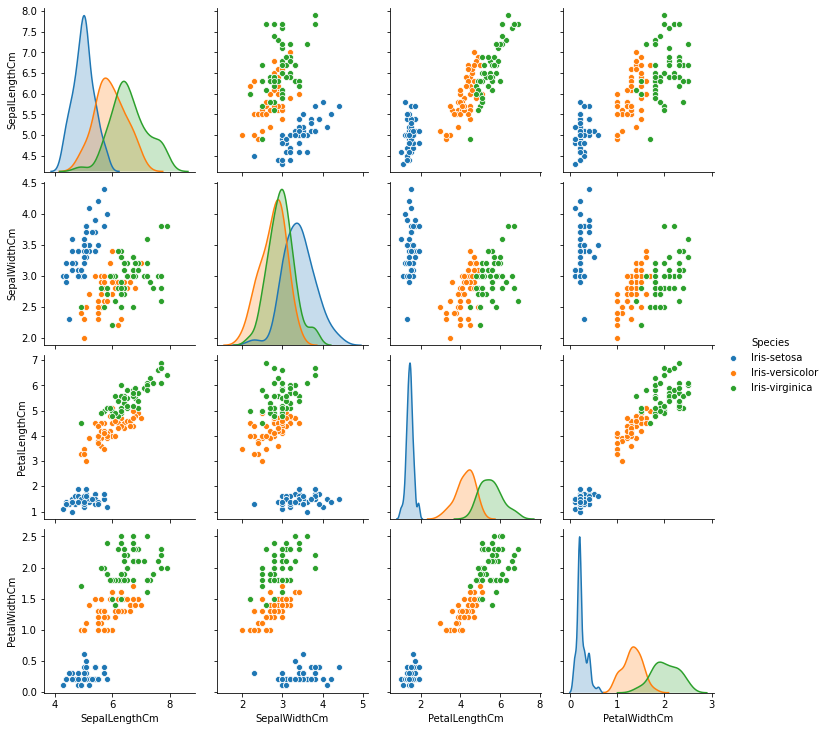

In [154]:
sns.pairplot(data,hue='Species')

## Feature Selection

In [45]:
x = data.iloc[:,0:4]
iris_feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)

### Train-Test Split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=1)
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (120, 4)
y_train (120,)


## Building Decision Tree Model

In [108]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier()

In [109]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

## Evaluating The model

In [110]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy : 96.66666666666667


## Visualizing Decision Tree

## Text Representation

In [189]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



##  Graphviz Representation 

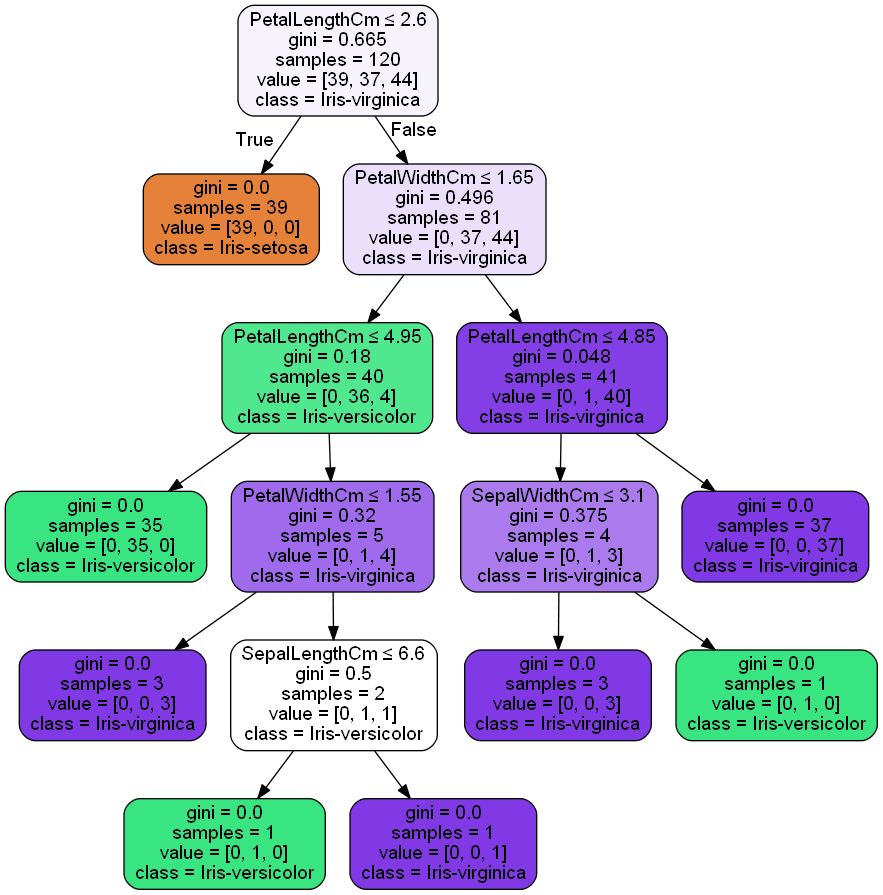

In [97]:
dot_data = tree.export_graphviz(clf,out_file='tree_.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = iris_feature ,class_names = target )
import pydot

(graph,) = pydot.graph_from_dot_file('tree_.dot')
graph.write_png('tree_.png')
from IPython.display import Image
Image(filename = 'tree_.png')

## Plot_tree Visualization

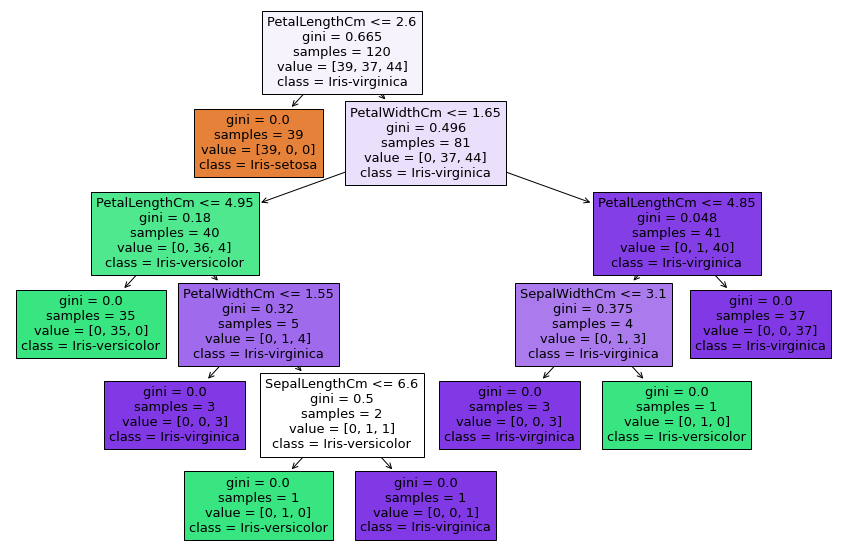

In [102]:
fig = plt.figure(figsize=(15,10))
plot_tree = tree.plot_tree(clf, 
                   feature_names=iris_feature,  
                   class_names=target,
                   filled=True)

## Optimizing Decision-Tree  

#### 1. Criterion : “Entropy” for the information gain.             
#### 2. Max_depth : 3 (Pre-Pruning)
#### 3. Splitter : (default = 'best')

In [147]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y1,test_size=0.2)
print('x_train1',x_train1.shape)
print('y_train1',y_train1.shape)

x_train1 (120, 4)
y_train1 (120,)


In [148]:
clf2= DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf2= clf2.fit(x_train1,y_train1)
clf2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [149]:
y_pred2 = clf2.predict(x_test1)
y_pred2

array([0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 1, 1, 2, 2])

## Evaluating The Optimized model

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred2)*100)

Accuracy: 100.0


## Visualizing Optimized Decision Tree

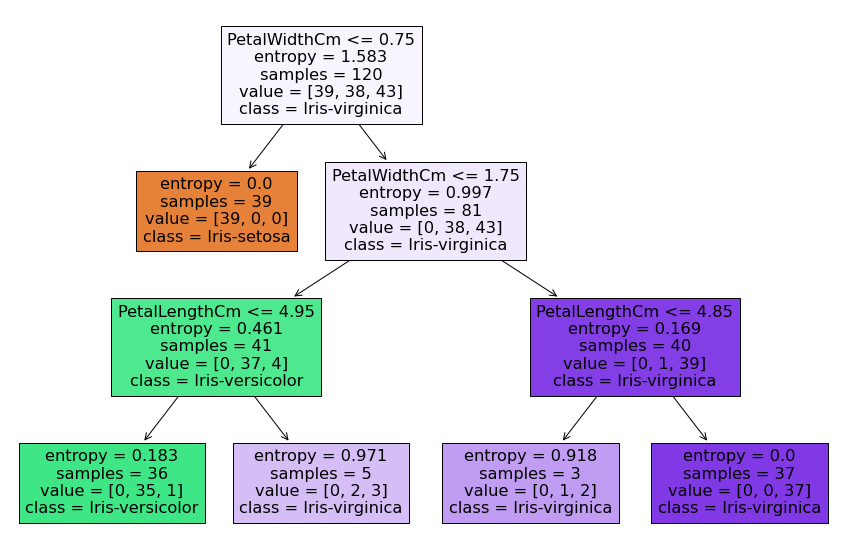

In [151]:
fig = plt.figure(figsize=(15,10))
plot_tree2 = tree.plot_tree(clf2, 
                   feature_names=iris_feature,  
                   class_names=target,
                   filled=True)